In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", palette="Set2", context="talk")

In [2]:
df = pd.read_csv("table1.csv")
df = df[df["Time"] != '0:00:00']

df = df.dropna(axis=1, how="all")
df = df.drop(['T'], axis=1)

translation_set_table_1 = {"neg cntrl": ["J1", "K1", "L1"],
                           "pos cntrl": ["J2", "K2", "L2"],
                           "TH 1": ["J3", "K3", "L3"],
                           "TH 1 + Trigger": ["J4", "K4", "L4"],
                           "TH 2": ["J5", "K5", "L5"],
                           "TH 2 + Trigger": ["J6", "K6", "L6"],
                           "TH 3": ["J7", "K7", "L7"],
                           "TH 3 + Trigger": ["J8", "K8", "L8"],
                           "TH 4": ["J9", "K9", "L9"],
                           "TH 4 + Trigger": ["J10", "K10", "L10"],
                           "TH 5": ["J11", "K11", "L11"],
                           "TH 5 + Trigger": ["J12", "K12", "L12"],
                           "TH 6": ["J13", "K13", "L13"],
                           "TH 6 + Trigger": ["J14", "K14", "L14"],
                           "TH 7": ["J15", "K15", "L15"],
                           "TH 7 + Trigger": ["J16", "K16", "L16"],
                           "TH 8": ["J17", "K17", "L17"],
                           "TH 8 + Trigger": ["J18", "K18", "L18"],
                           "TH 9": ["J19", "K19", "L19"],
                           "TH 9 + Trigger": ["J20", "K20", "L20"],
                           "TH 10": ["J21", "K21", "L21"],
                           "TH 10 + Trigger": ["J22", "K22", "L22"],}

current_translation_set = translation_set_table_1

dfm = df.melt(id_vars="Time")
dfm

,Time,variable,value
0,8:01:09,J1,23.0
1,8:11:09,J1,22.0
2,8:21:09,J1,23.0
3,8:31:09,J1,30.0
4,8:41:09,J1,24.0
...,...,...,...
2371,12:41:09,L24,11.0
2372,12:51:09,L24,18.0
2373,13:01:09,L24,12.0
2374,13:11:09,L24,17.0


In [3]:
dfm["exp"] = ''


for i in range(len(dfm)):
    cell = dfm.at[i, "variable"]

    for k, v in current_translation_set.items():
        if cell in v:
            dfm.at[i, "exp"] = k


In [4]:
# Define a function to convert time strings to seconds
def time_str_to_seconds(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

# Apply the function to the 'time_str' column and create a new 'time_seconds' column
dfm['Time (s)'] = dfm['Time'].apply(time_str_to_seconds)

# Display the DataFrame
dfm["Time (s)"] = dfm["Time (s)"] - dfm["Time (s)"].min()
dfm

,Time,variable,value,exp,Time (s)
0,8:01:09,J1,23.0,neg cntrl,0
1,8:11:09,J1,22.0,neg cntrl,600
2,8:21:09,J1,23.0,neg cntrl,1200
3,8:31:09,J1,30.0,neg cntrl,1800
4,8:41:09,J1,24.0,neg cntrl,2400
...,...,...,...,...,...
2371,12:41:09,L24,11.0,,16800
2372,12:51:09,L24,18.0,,17400
2373,13:01:09,L24,12.0,,18000
2374,13:11:09,L24,17.0,,18600


In [5]:
df_plot = dfm[dfm["exp"] != '']
df_plot

,Time,variable,value,exp,Time (s)
0,8:01:09,J1,23.0,neg cntrl,0
1,8:11:09,J1,22.0,neg cntrl,600
2,8:21:09,J1,23.0,neg cntrl,1200
3,8:31:09,J1,30.0,neg cntrl,1800
4,8:41:09,J1,24.0,neg cntrl,2400
...,...,...,...,...,...
2305,12:41:09,L22,456.0,TH 10 + Trigger,16800
2306,12:51:09,L22,447.0,TH 10 + Trigger,17400
2307,13:01:09,L22,459.0,TH 10 + Trigger,18000
2308,13:11:09,L22,449.0,TH 10 + Trigger,18600


In [9]:
df_plot_no_pos = df_plot[df_plot["exp"] != "pos cntrl"]
df_plot_no_pos

,Time,variable,value,exp,Time (s)
0,8:01:09,J1,23.0,neg cntrl,0
1,8:11:09,J1,22.0,neg cntrl,600
2,8:21:09,J1,23.0,neg cntrl,1200
3,8:31:09,J1,30.0,neg cntrl,1800
4,8:41:09,J1,24.0,neg cntrl,2400
...,...,...,...,...,...
2305,12:41:09,L22,456.0,TH 10 + Trigger,16800
2306,12:51:09,L22,447.0,TH 10 + Trigger,17400
2307,13:01:09,L22,459.0,TH 10 + Trigger,18000
2308,13:11:09,L22,449.0,TH 10 + Trigger,18600


<Axes: xlabel='Time (s)', ylabel='value'>

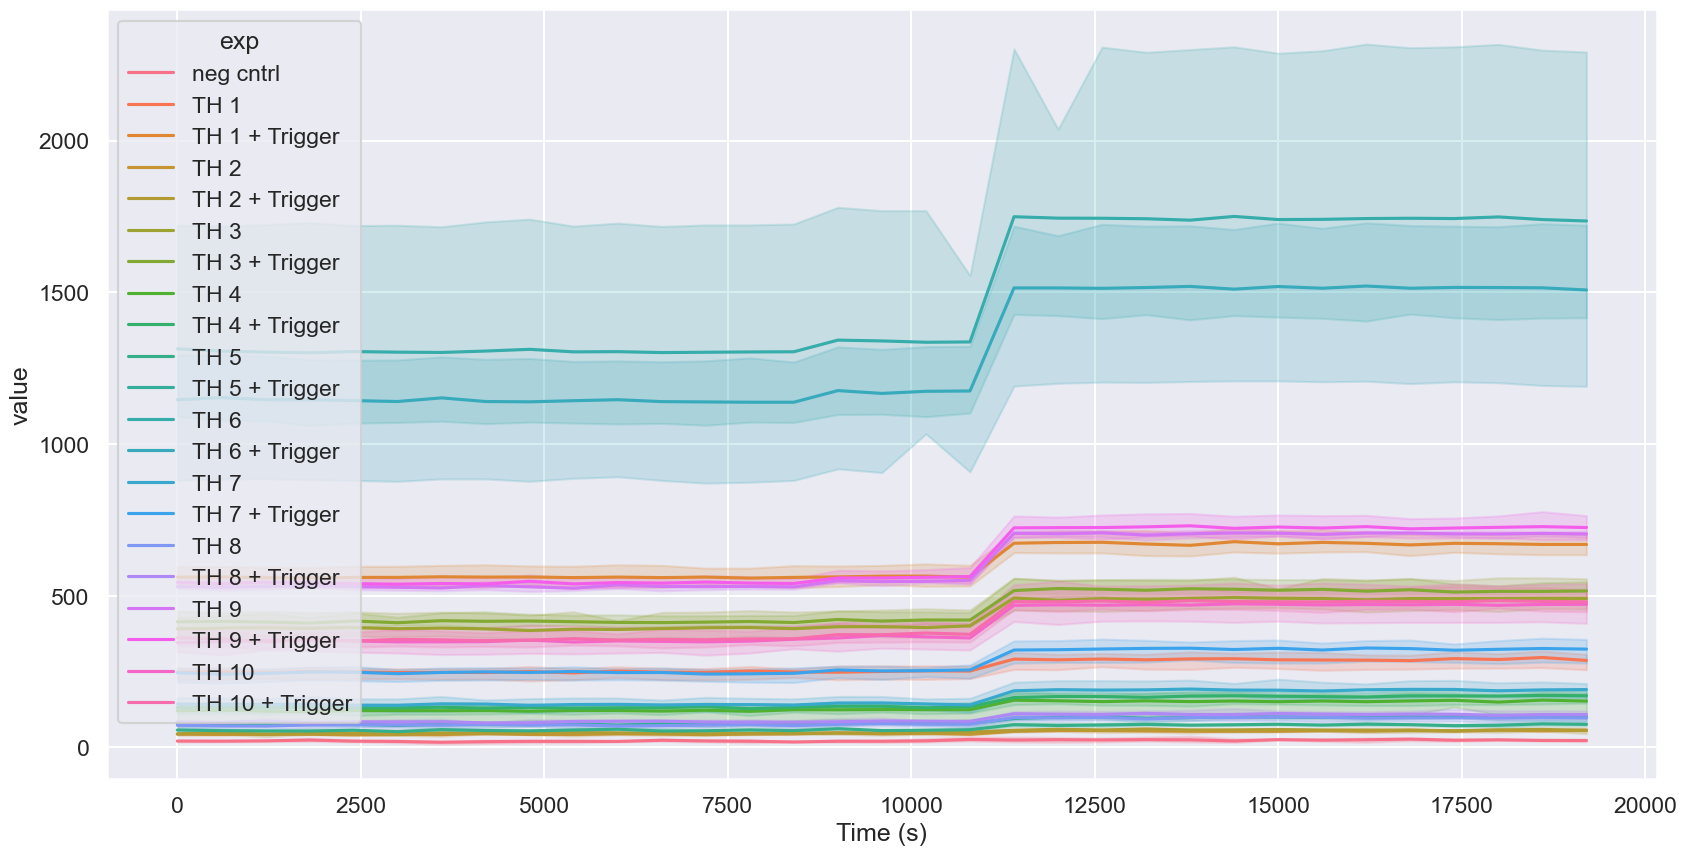

In [10]:
plt.figure(figsize=[20,10])

sns.lineplot(x="Time (s)", y="value", hue="exp", data=df_plot_no_pos)

In [13]:
triplicate = df_plot

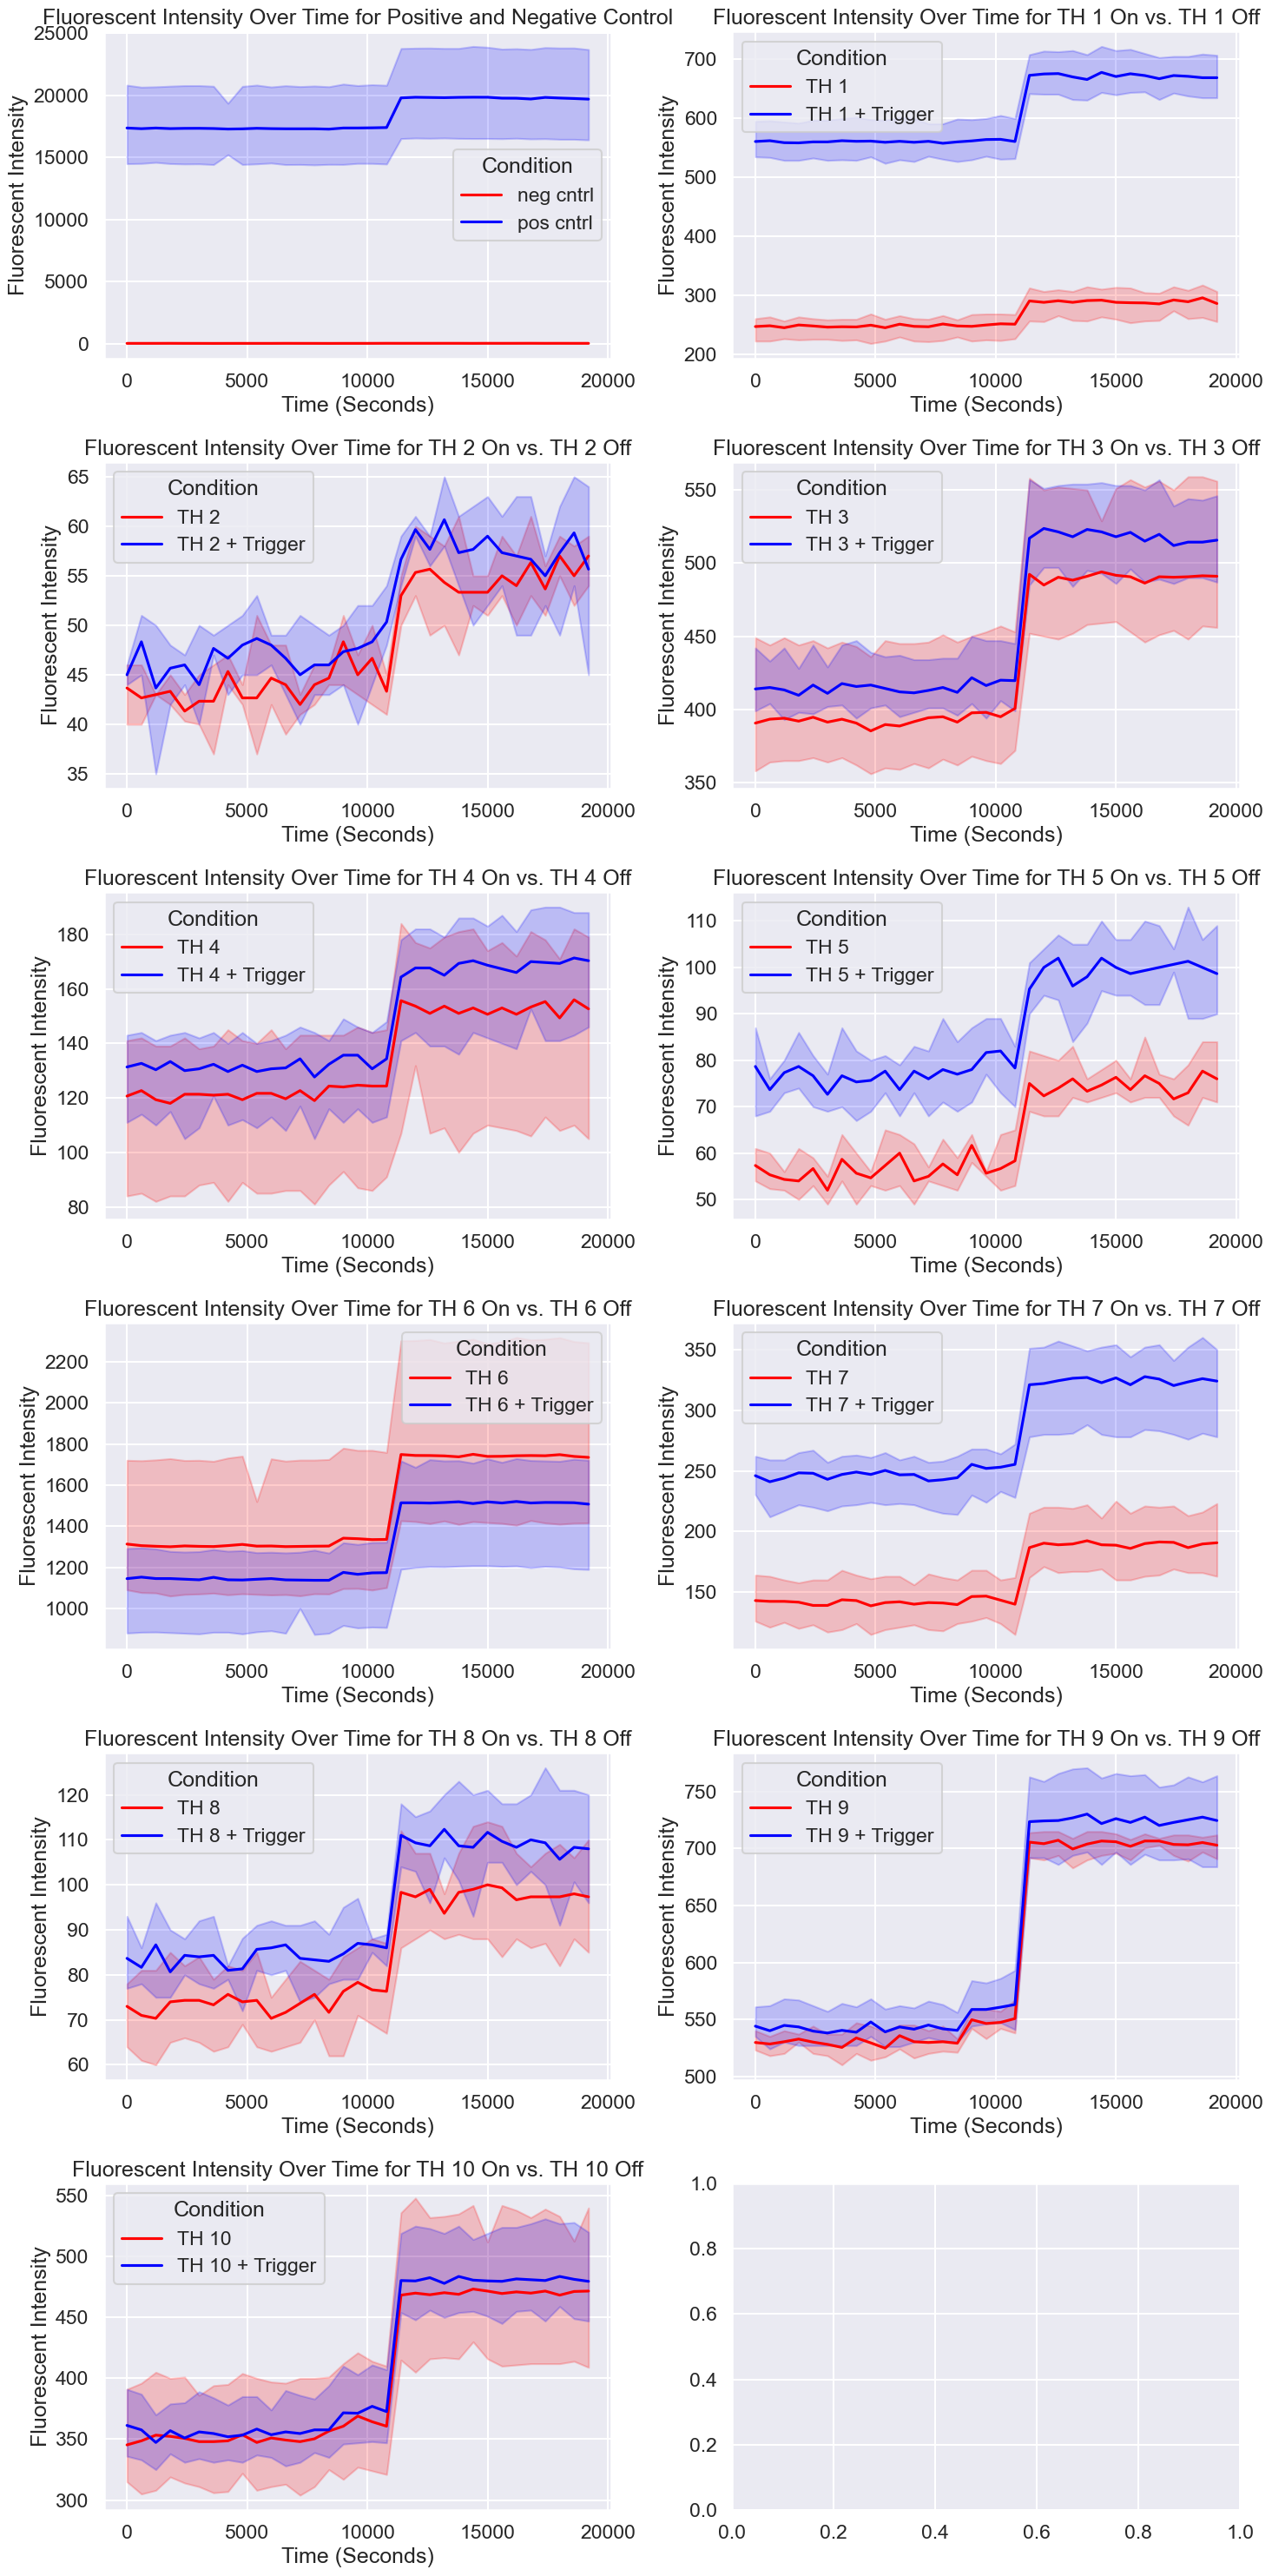

In [26]:
num_switches = 10

# Create subplots with multiple rows and columns
num_rows = num_switches // 2 + 1  # You can adjust the number of rows as needed
num_cols = 2  # You can adjust the number of columns as needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot Controls
lab_pos_control = triplicate.loc[triplicate["exp"].isin(["neg cntrl", "pos cntrl"]), :]
sns.lineplot(x="Time (s)", y="value", 
            hue="exp", 
            palette={"neg cntrl": "red", "pos cntrl": "blue"}, # fix if you hate the plot colors
            data=lab_pos_control, 
            ax=axes[0])
axes[0].set_xlabel("Time (Seconds)")
axes[0].set_ylabel("Fluorescent Intensity")
axes[0].set_title("Fluorescent Intensity Over Time for Positive and Negative Control")
axes[0].legend(title="Condition")

# Iterate over switch labels
for j in range(num_switches):
    # Select relevant data for the current switch
    i = j + 1 # Make space on the top of the plot for the controls
    switch_label = f"TH {j + 1}"
    switch_data = triplicate.loc[triplicate["exp"].isin([ f"{switch_label}", f"{switch_label} + Trigger"]), : ]

    # Create a line plot on the current subplot
    sns.lineplot(x="Time (s)", y="value", 
                hue="exp", 
                palette={f"{switch_label}": "red", f"{switch_label} + Trigger": "blue"}, # fix if you hate the plot colors
                data=switch_data, 
                ax=axes[i])

    # Set plot labels and title
    axes[i].set_xlabel("Time (Seconds)")
    axes[i].set_ylabel("Fluorescent Intensity")
    axes[i].set_title(f"Fluorescent Intensity Over Time for {switch_label} On vs. {switch_label} Off")

    # Show the legend
    axes[i].legend(title="Condition")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [11]:
df_plot['exp'].unique()

array(['neg cntrl', 'pos cntrl', 'TH 1', 'TH 1 + Trigger', 'TH 2',
       'TH 2 + Trigger', 'TH 3', 'TH 3 + Trigger', 'TH 4',
       'TH 4 + Trigger', 'TH 5', 'TH 5 + Trigger', 'TH 6',
       'TH 6 + Trigger', 'TH 7', 'TH 7 + Trigger', 'TH 8',
       'TH 8 + Trigger', 'TH 9', 'TH 9 + Trigger', 'TH 10',
       'TH 10 + Trigger'], dtype=object)